In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Business Problem

# 2. Data collection and description

In [2]:
data = pd.read_csv('Toyoto_Corrola.csv')
data1 = data[['Price','Age_08_04','KM','HP','Cylinders','Doors','Gears','Weight']]
data1

,Price,Age_08_04,KM,HP,Cylinders,Doors,Gears,Weight
0,13500,23,46986,90,4,3,5,1165
1,13750,23,72937,90,4,3,5,1165
2,13950,24,41711,90,4,3,5,1165
3,14950,26,48000,90,4,3,5,1165
4,13750,30,38500,90,4,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,4,3,5,1025
1432,10845,72,19000,86,4,3,5,1015
1433,8500,71,17016,86,4,3,5,1015
1434,7250,70,16916,86,4,3,5,1015


In [3]:
data1.describe

<bound method NDFrame.describe of       Price  Age_08_04     KM   HP  Cylinders  Doors  Gears  Weight
0     13500         23  46986   90          4      3      5    1165
1     13750         23  72937   90          4      3      5    1165
2     13950         24  41711   90          4      3      5    1165
3     14950         26  48000   90          4      3      5    1165
4     13750         30  38500   90          4      3      5    1170
...     ...        ...    ...  ...        ...    ...    ...     ...
1431   7500         69  20544   86          4      3      5    1025
1432  10845         72  19000   86          4      3      5    1015
1433   8500         71  17016   86          4      3      5    1015
1434   7250         70  16916   86          4      3      5    1015
1435   6950         76      1  110          4      5      5    1114

[1436 rows x 8 columns]>

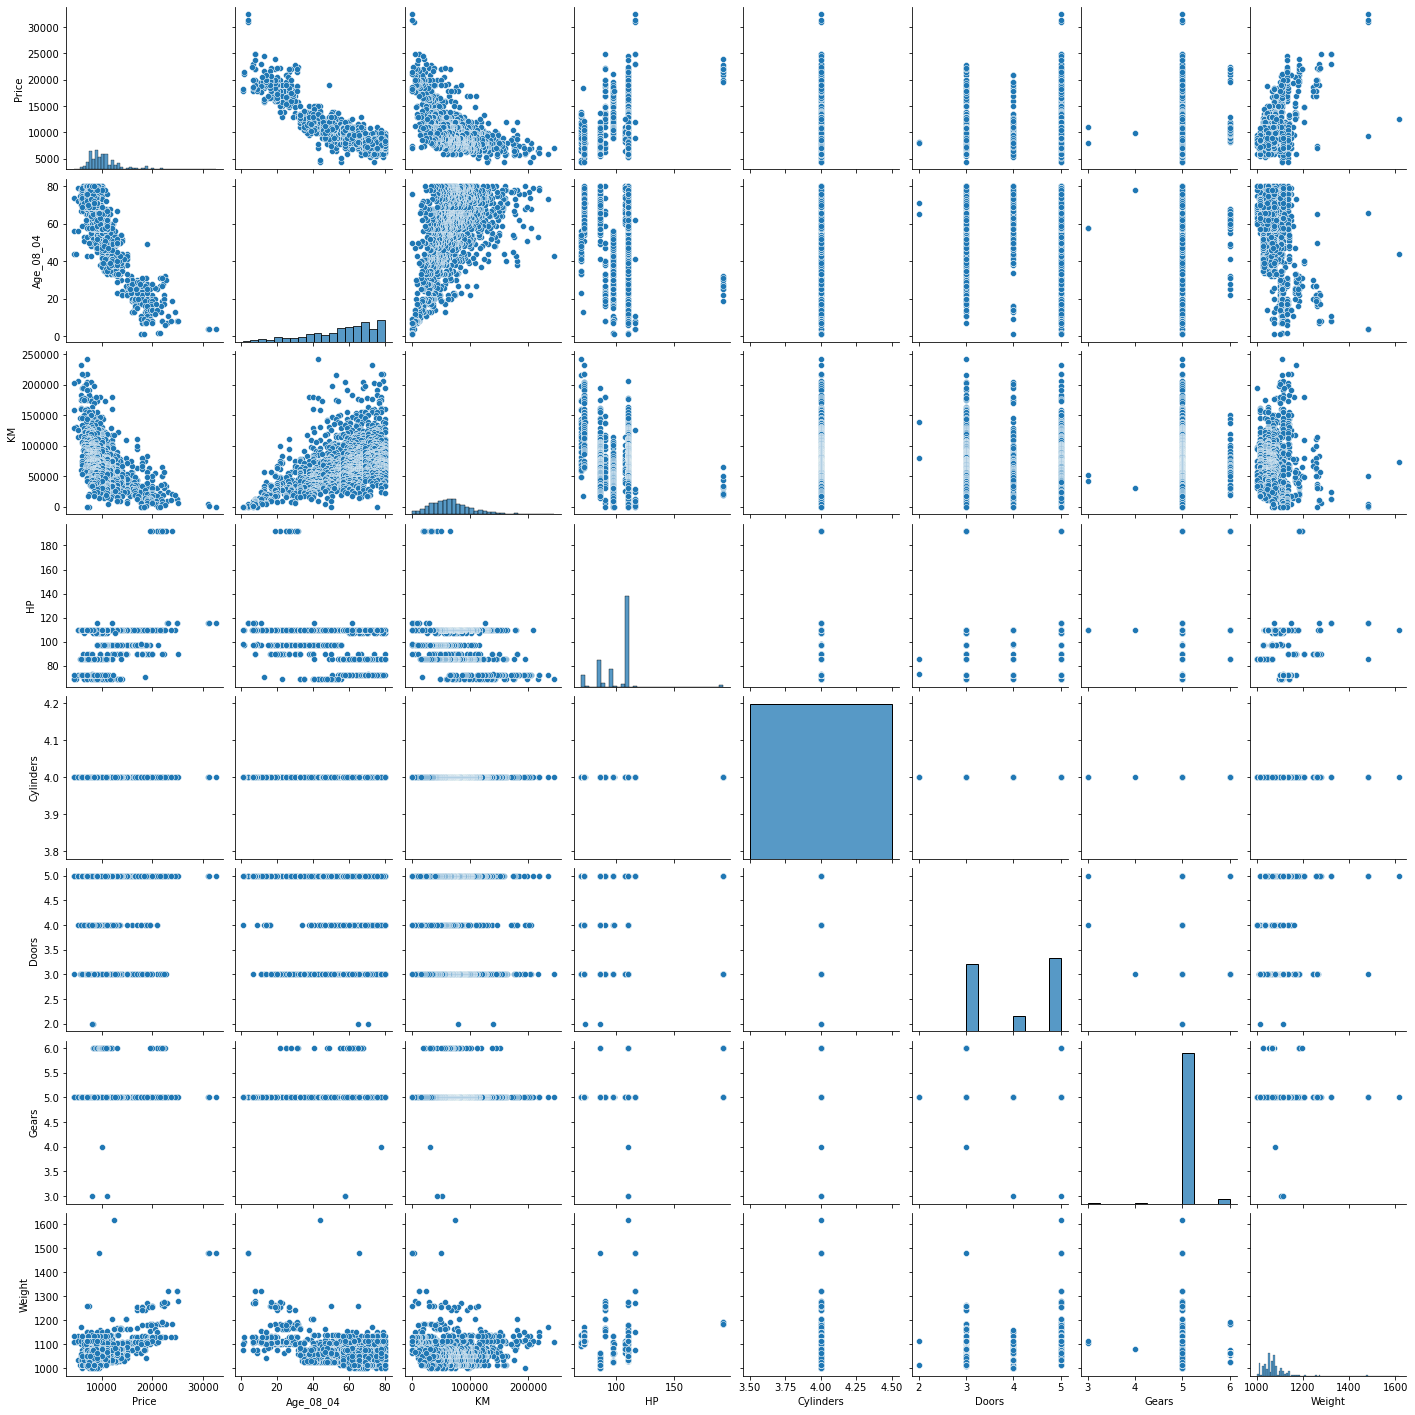

In [4]:
sns.pairplot(data1)

# 3. Correlation Matrix

In [6]:
corrMatrix = data1.corr()

<AxesSubplot:>

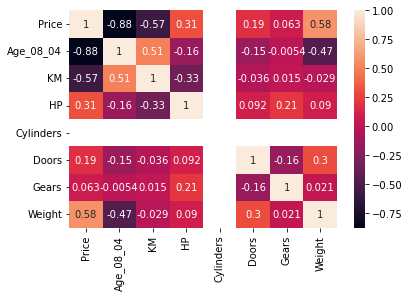

In [7]:
sns.heatmap(corrMatrix, annot = True)

# 4. Regression Model

In [9]:
X = data1[['Age_08_04','KM','HP','Cylinders','Doors','Gears','Weight']]
Y = data1[['Price']]

In [10]:
model = sm.OLS(Y,X).fit()
predictions= model.predict(X)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:08:52   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Cylinders  -1746.0934    328.009     -5.323      0.000   -2389.524   -1102.663
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     7.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R sq and p Value of the Model is Good and the model can be accepted. However as you can see not all variables have acceptable p value. Thus we have Multicollinearity issue in our Data Frame

# 4. Solving Multicollinearity

## 4.1 Finding Cook's Distance

In [16]:
info1 = model.get_influence()

In [17]:
summ_data = info1.summary_frame()

In [18]:
summ_data.sort_values('cooks_d', ascending=False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_Cylinders,dfb_Doors,dfb_Gears,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
221,-1.209500,0.591196,0.065993,1.679676,0.509396,0.142508,-2.614581,9.553151e-01,-7.780658,0.099474,-2.585963,-7.948115,-2.641619
960,-0.990181,0.660427,0.321305,1.036951,0.580761,0.068725,-1.713225,4.260078e-01,-5.886751,0.079234,-1.726863,-5.957369,-1.747578
109,0.285750,-0.321929,-0.028023,-0.606258,-0.189756,-0.057904,0.990035,1.595297e-01,4.631868,0.049476,1.056744,4.665402,1.064394
601,-0.545503,0.617693,0.302484,0.496049,0.383993,0.025962,-0.895581,1.440623e-01,-6.380672,0.024171,-1.004209,-6.471290,-1.018471
111,0.226082,-0.252744,-0.020771,-0.484699,-0.152061,-0.046844,0.791685,1.025649e-01,3.721037,0.049296,0.847322,3.737888,0.851159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,-0.000005,-0.000066,-0.000142,-0.000089,-0.000017,0.000052,0.000118,1.073807e-08,-0.007025,0.001521,-0.000274,-0.007023,-0.000274
1012,-0.000115,0.000126,-0.000047,-0.000005,0.000125,0.000044,-0.000048,7.908402e-09,-0.004263,0.003038,-0.000235,-0.004261,-0.000235
1080,-0.000037,-0.000041,0.000016,0.000045,-0.000033,-0.000001,-0.000055,1.982037e-09,-0.001647,0.005088,-0.000118,-0.001646,-0.000118
256,-0.000048,0.000018,0.000021,0.000023,0.000045,-0.000003,-0.000037,1.066271e-09,0.001745,0.002444,0.000086,0.001745,0.000086


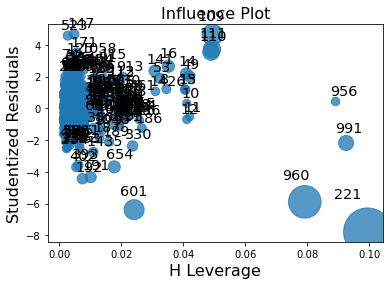

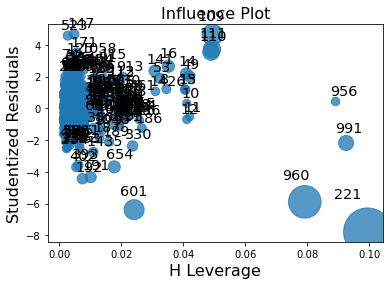

In [23]:
info1.plot_influence()

Index 221 has highest Cook's Distance

Thus it will be wise to drop this row from the data set

## 4.2 Finding Variance Inflation Factor (VIF)

In [24]:
vif = pd.DataFrame()

In [25]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [26]:
vif["features"] = X.columns

In [27]:
vif.round(1)

,VIF Factor,features
0,1.9,Age_08_04
1,1.6,KM
2,1.2,HP
3,1363.9,Cylinders
4,1.1,Doors
5,1.1,Gears
6,1.5,Weight


As expected, Geras and Weight have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables to improve model and try to solve multicolinearity.

In [28]:
new_X = data1[['Age_08_04','KM','HP','Cylinders','Doors','Gears',]]

In [30]:
new_model = sm.OLS(Y, new_X).fit()
predictions = new_model.predict(new_X)

In [31]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:20:58   Log-Likelihood:                -12597.
No. Observations:                1436   AIC:                         2.521e+04
Df Residuals:                    1430   BIC:                         2.524e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -152.4287      2.609    -58.430      0.000    -157.546    -147.311
KM            -0.0124      0.001     -9.173      0.000      -0.015      -0.010
HP            32.8501      3.031     10.838      0.000      26.905      38.796
Cylinders   2955.4324    293.475     10.070      0.000    2379.745    3531.120
Doors        224.1765     44.889      4.994      0.000     136.120     312.233
Gears        804.9896    229.315      3.510      0.000     355.160    1254.820
==============================================================================
Omnibus:                      421.849   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3170.219
Skew:                           1.158   Prob(JB):                         0.00
Kurtosis:                       9.901   Cond. No.                     6.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you can see, once we remove "Weight" from input variables and run the model again, all the variables are significant.

# 5. Final Model

In [32]:
new_data = data1.drop(data1.index[221])

In [33]:
new_X = new_data[['Age_08_04','KM','HP','Cylinders','Doors','Gears',]]
new_Y = new_data[['Price']]

In [34]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [35]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1254.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:23:40   Log-Likelihood:                -12589.
No. Observations:                1435   AIC:                         2.519e+04
Df Residuals:                    1429   BIC:                         2.522e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -152.4446      2.610    -58.408      0.000    -157.564    -147.325
KM            -0.0124      0.001     -9.163      0.000      -0.015      -0.010
HP            32.8660      3.032     10.839      0.000      26.918      38.814
Cylinders   2955.2828    293.567     10.067      0.000    2379.414    3531.152
Doors        224.4858     44.914      4.998      0.000     136.382     312.589
Gears        804.6811    229.389      3.508      0.000     354.706    1254.656
==============================================================================
Omnibus:                      421.006   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3159.975
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       9.892   Cond. No.                     6.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 6.  Output Interpretation

In [ ]:
1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == -152.44
Thus if the value of x increased by 1, the predicted value of Price will decrease by 152.44

3 - Adj. R-sqared == 0.814
Thus the model explains 81.4% of the variance in dependent variable